In [3]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация датасета

sgm - дисперсия гауссова распределения
n - количество точек

In [4]:
sgm=0.5
n=2000
red_dots1 = numpy.random.multivariate_normal([3, 5, 9], [[sgm,0,0], [0, sgm, 0], [0, 0, sgm]], n)
blue_dots1 = numpy.random.multivariate_normal([4, 6, 10], [[sgm,0,0], [0, sgm, 0], [0, 0, sgm]], n)
red_dots=numpy.insert(red_dots1, 3, 0, axis=1)
blue_dots=numpy.insert(blue_dots1, 3, 1, axis=1)
data = numpy.concatenate((red_dots, blue_dots))
numpy.random.shuffle(data)

data


array([[  3.02881693,   5.12947319,   9.25978469,   0.        ],
       [  2.27136864,   4.68350107,   8.75629011,   0.        ],
       [  1.94542818,   4.49874992,   7.96425588,   0.        ],
       ..., 
       [  2.33969127,   3.77723401,   8.75178525,   0.        ],
       [  4.29780892,   6.3109958 ,  11.16969965,   1.        ],
       [  1.96108309,   5.47793228,   9.77844511,   0.        ]])

# Трёхмерный рисунок

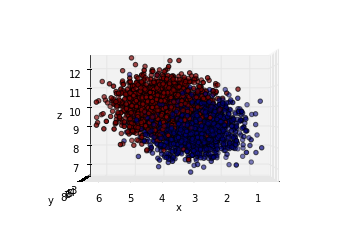

In [5]:
ax=plt.axes(projection='3d')
ax.view_init(0,90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x=data[:, 0]
y=data[:, 1]
z=data[:, 2]
dx=max(x)-min(x)
dy=max(y)-min(y)
dz=max(z)-min(z)
dcommon = max(dx, dy, dz)
mx = (max(x)+min(x))/2
my = (max(y)+min(y))/2
mz = (max(z)+min(z))/2
ax.set_xlim3d((mx-dcommon/2,mx+dcommon/2))
ax.set_ylim3d((my-dcommon/2,my+dcommon/2))
ax.set_zlim3d((mz-dcommon/2,mz+dcommon/2))
ax.scatter(x,y,z, c=data[:, 3])
plt.show()

In [13]:
data.shape

(4000, 4)

In [14]:
w=numpy.array([1,2,3])
w

array([1, 2, 3])

In [15]:
n=data.shape[0]
projections=numpy.zeros((n,2))
projections[:,1]=data[:,3]
for t in range(n):
    projections[t,0] = w.dot(data[t,:3])

In [16]:
def make_proj(data, w):
    pr1=data[:,:3].dot(w)
    return numpy.stack((pr1,data[:,3]), axis=1)

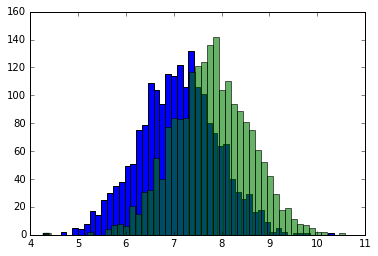

In [17]:
prj=make_proj(data, numpy.array([0.2, -0.5, 1]))
plt.hist(prj[prj[:, 1]<0.5][:, 0], 50)
plt.hist(prj[prj[:, 1]>0.5][:, 0], 50, alpha=0.6)
plt.show()

/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


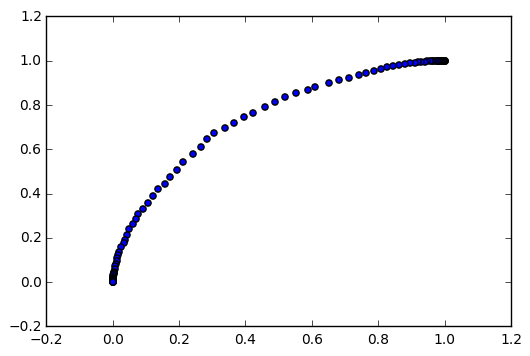

In [127]:
prj=make_proj(data, numpy.array([0.2, -0.5, 1]))
x=[]
y=[]
for thresh in numpy.linspace(numpy.min(prj[:,0]), numpy.max(prj[:, 0]), 100):
    tp = 0
    fp = 0
    den_less = 0
    den_more = 0
    for t in range(n):
        guess = 0
        if prj[t, 0] > thresh:
            guess = 1
        if guess > 0.5 and prj[t, 1] > 0.5:
            tp += 1
        if guess > 0.5 and prj[t, 1] < 0.5:
            fp += 1
        if prj[t, 1] < 0.5:
            den_less += 1
        else:
            den_more += 1
    if den_more > 0 and den_less > 0:
        current_x = fp / den_less
        current_y = tp / den_more
        x.append(current_x)
        y.append(current_y)
plt.scatter(x,y)